# Задания по теме "Обучение без учителя"

Слайды лекции https://yadi.sk/i/TSnd_oPY3QGBoH

Присылайте вопросы на <b>I-have-a-question@yandex.ru</b>

# Задание 1

X = [[4.7,3.2], [4.9, 3.1], [5.9, 3.2], [6, 3]]

centroids = [[5.5, 3.2], [6.5, 3]]

Вычислите кластеры точек X с помощью алгоритма K-means, где евклидово расстояние - метрика дистанции, и centroids изначальное положение центроидов.

Вычисления могут быть произведены любым удобным для Вас способом кроме использования sklearn.cluster.KMeans

Ответом на задание является соответствие точка-кластер и финальное положение центроидов.

Вам могут помочь:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.average.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html

In [9]:
from scipy.spatial.distance import euclidean
from numpy import *
import numpy as np
# X = [[4.7,3.2], [4.9, 3.1], [5, 3], [5.9, 3.2], [6, 3], [6.2, 2.8]]
X = [[4.7,3.2], [4.9, 3.1], [5.9, 3.2], [6, 3]]
# centroids = [[5.5, 3.2], [6.5, 3]]
# centroids = [[ 5.16666667,  3.16666667], [6, 3]]
# centroids = [[ 4.8 ,  3.15], [ 5.95,  3.1 ]]

assig = []
for x in X:
    buf = []
    for centr in centroids:
        print("centr:", centr, "distance:",  euclidean(centr, x))
        buf.append(euclidean(centr, x))
    assig.append(np.argmin(buf))
print(assig)

# [0, 0, 0, 1]
# cent1 = np.average([[4.7,3.2], [4.9, 3.1], [5.9, 3.2]], axis=0)
# cent1 = [ 5.16666667  3.16666667]
# cent2 = [6, 3]

# [0, 0, 1, 1]
# cent1 = np.average([[4.7,3.2], [4.9, 3.1]], axis=0)
# cent2 = np.average([[5.9, 3.2], [6, 3]], axis=0)
# [ 4.8   3.15]
# [ 5.95  3.1 ]

centr: [4.8, 3.15] distance: 0.11180339887498929
centr: [5.95, 3.1] distance: 1.2539936203984452
centr: [4.8, 3.15] distance: 0.11180339887498988
centr: [5.95, 3.1] distance: 1.0499999999999998
centr: [4.8, 3.15] distance: 1.1011357772772625
centr: [5.95, 3.1] distance: 0.11180339887498948
centr: [4.8, 3.15] distance: 1.2093386622447826
centr: [5.95, 3.1] distance: 0.11180339887498948
[0, 0, 1, 1]


# Задание 2

Известно, что алгоритм K-means решает следующую задачу оптимизации:

$$min \sum_{i=1}^{K} \sum_{x \in S_i}^{ } \left \| x - \mu_i \right \|^2 $$

где 

$K$ - количество кластеров

$\mu_i$ - центроид кластера $i$

$S_i$ - кластер $i$

Скачайте файл точек https://yadi.sk/i/dhbPvKcg3QGBhn 

Найдите в лекции каким образом найти оптимальное значение кластеров с помощью функции оптимизации, далее найдите в справке http://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html значение функции оптимизации для параметра n_clusters. Выведите оптимальное n_clusters для точек файла.

In [16]:
import numpy as np
from sklearn.cluster import *
X = np.loadtxt('points.txt', delimiter='\t')
kmeans = KMeans(n_clusters=3, random_state=100, verbose=False)
labels = kmeans.fit_predict(X)

2746641.3759


# Задание 3

Изученный нами алгоритм DBSCAN не требует "количество кластеров" в качестве параметра. Кластеризуйте точки файла points.txt с помощью DBSCAN и выведите получившееся количество кластеров.

Сравните с результатом в задании 2.


In [23]:
dbs = DBSCAN(eps=25.5)
labels = dbs.fit_predict(X)
print(labels)
print(max(labels))

[ 0  1  2  2  3  4  5  6  2  7  6  8  1  9 10  0  8  7 11 12  5  5  8  1  9
  4 12 13 11 13 10  0 11  9 14  9  7 10 14 13  3  6  5 15 10  9 10 16  3  5
 12  4  9  4 13 10 15 16  4  1 16 11  1  8  2  4  5  7  8  3  8 10 11 16  3
  9 11 14  5  9 16  0  9  1  6  1 13 13  5  7  1  9 16  4  9  7 14  5 12  4
 15  4  1  0 16  3 15 13  0 13 11  4  3 13 10 16 15  1  9 11 13 14  2  5  3
 10 15  7  6 10  5  8  9  6  9  1  0  2  4  0 12 16  5  9  4  4  8  6 10 12
  3 13  7 14 15  8  8 10 15 16 14 15 14  6  3 11 16 13  3  9 10  2  8 13  6
  1  0 12  0  0 14  9 13  1  4  0  2 11 11  5  6  1  6 14  4  8  6  0  1 15
  5  1  9  4  3  9  3 14 16 12 11  4  9  6  2 11  8  1  4  7  4  4 14  4 12
  6  2 12 15 12  0  0  7  3  2  1 13  8 15  8 14 13  8  6  0 16  9 14 16 15
  2  3  6 10  2 13  6  1  4 16  5  1  8 13 16  7  2 13 14 14 16  8 13  6  9
  8 14  7 14 15  0  5 14  0  3  3  0  1 14  6 13 10 15  5  4  3  4 13 11  2
 13  5  3  1 10 13 16  9 12  8 13  6  7  0  5 11 14  8  3 12 14 10  1 13 15
 14  7  5  7

In [8]:
# 1000 x 100
import numpy as np
from sklearn.cluster import *
X = np.loadtxt('points.txt', delimiter='\t')

1000


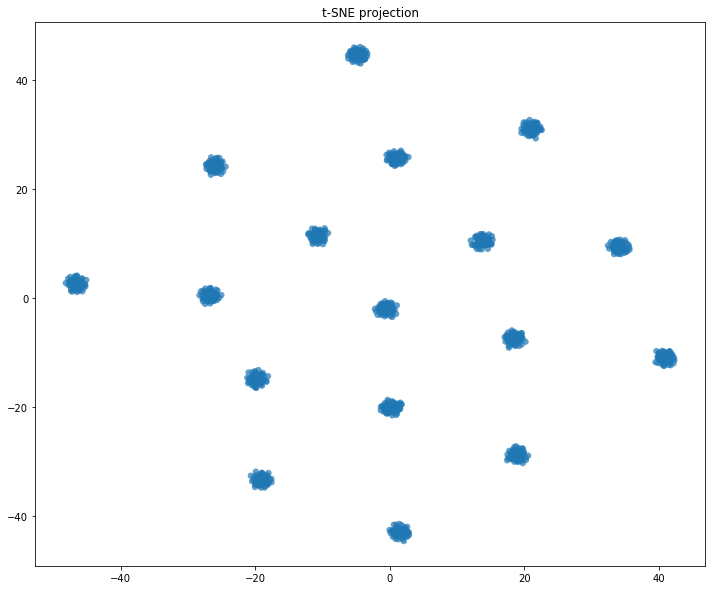

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(random_state=25)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
# plt.colorbar()
plt.title('t-SNE projection')
plt.show()